>Prophet（先知）是一个用来预测时间序列数据的程序，它基于非线性趋势加性模型实现，适合于年度、周度季节性以及节假日等趋势的情况。 对于至少有一年历史数据的日常周期性数据，效果最好。 Prophet对失踪数据，趋势的转变和大量的异常值是强有力的。
***
* 本文用Prophet实现股票预测

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 10.0.


Date
2018-01-02    417.799988
2018-01-03    422.200012
2018-01-04    431.799988
2018-01-05    433.200012
2018-01-08    438.600006
2018-01-09    443.799988
2018-01-10    440.399994
2018-01-11    429.399994
2018-01-12    442.200012
2018-01-15    433.200012
2018-01-16    444.200012
2018-01-17    449.000000
2018-01-18    447.799988
2018-01-19    452.399994
Name: Close, dtype: float64
                 Close
Date                  
2018-01-02  417.799988
2018-01-03  422.200012
2018-01-04  431.799988
2018-01-05  433.200012
2018-01-08  438.600006
2018-01-09  443.799988
2018-01-10  440.399994
2018-01-11  429.399994
2018-01-12  442.200012
2018-01-15  433.200012
2018-01-16  444.200012
2018-01-17  449.000000
2018-01-18  447.799988
2018-01-19  452.399994
         Date       Close
0  2018-01-02  417.799988
1  2018-01-03  422.200012
2  2018-01-04  431.799988
3  2018-01-05  433.200012
4  2018-01-08  438.600006
5  2018-01-09  443.799988
6  2018-01-10  440.399994
7  2018-01-11  429.399994
8  2018-01-12  

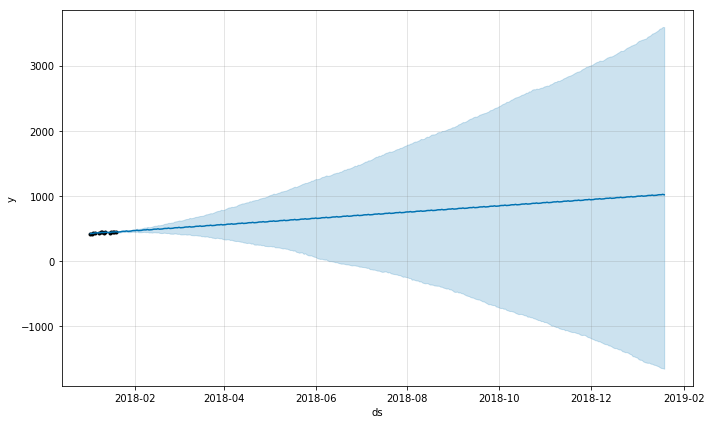

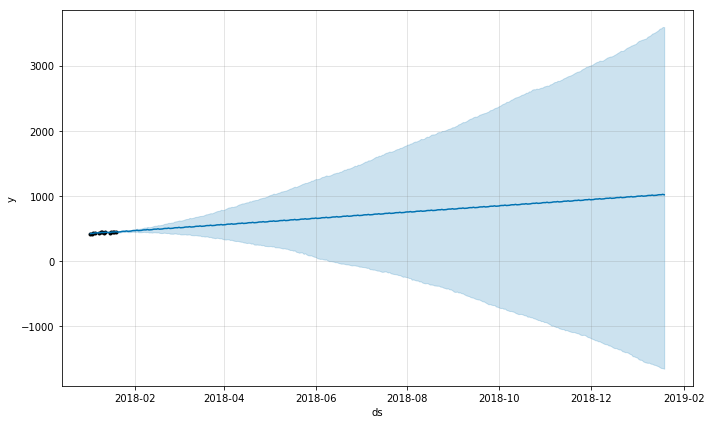

In [58]:
%matplotlib inline
from fbprophet import Prophet
import pandas_datareader.data as web
import pandas as pd
import datetime
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2018,1,19)
QJD = web.DataReader('0700.hk','yahoo',start,end)
ff = QJD['Close']
print(ff)
SZW = pd.DataFrame(ff)
ff = SZW.reset_index('Date')
ff.rename(columns={'Date':'day','Close':'price'},inplace=True)
m = Prophet(interval_width=0.95)
m.fit(ff)
future=m.make_future_dataframe(periods=365)
future.head()
forecast = m.predict(future)
m.plot(forecast)